In [1]:
import math
import random
import numpy as np
import cv2

In [2]:
class Point:
# 1 điểm thì có:
    def __init__(self, x, y):
        # 2 thuộc tính:
        self.x = x # Tung độ
        self.y = y # Hoành độ
    
    # Có phương thức tính khoảng cách giữa 2 điểm {Căn bậc 2 của [(xA - xB)^2 + (yA - yB)^2]} 
    def distance(self, point2):
        return math.sqrt( (self.x - point2.x) ** 2 + (self.y - point2.y) ** 2 )

In [3]:
class Circle:
# Một hình tròn thì có
    def __init__(self, O, R):
        self.O = O # Tâm hình tròn
        self.R = R # Bán kính hình tròn
    
    # Phương thức kiểm tra xem điểm nào nằm trong hình tròn:
    def contain(self, inter_Point):
        return self.O.distance( inter_Point ) <= self.R
    
    # Phương thức lấy tâm đường tròn 
    def getCenter( self ):
        return self.O

In [4]:
class Square:
# Một hình vuông thì có:
    def __init__(self, topLeft, size):
        self.topLeft = topLeft # điểm góc trên cùng bên trái
        self.size = size # Độ lớn hình vuông (độ dài cạnh)
    
    # Phương thức lấy một điểm ngẫu nhiên trong hình vuông đó:
    def randPoint(self):
        # Lấy một điểm thuộc hình vuông có:
        x = random.uniform( self.topLeft.x, self.topLeft.x + self.size ) # tung độ bất kì phí bên phải topleft (từ topleft đến giới hạn đầu phải)
        y = random.uniform( self.topLeft.y, self.topLeft.y + self.size ) # hoành độ bất kì phía bên dưới topleft (từ topleft đến giới hạn đầu dưới)
        return Point(x, y) # trả về một điển có tọa độ (x, y) nằm trong hình vuông

In [5]:
class Transform:
    def __init__( self, scale = 1.0, translate = ( 0.0,0.0 ) ):
        self.scale = scale
        self.translate = translate
    
    def forward( self, p ):
        x = p.x * self.scale + self.translate[0]
        y = p.y * self.scale + self.translate[1]
        return Point( x, y )
    
    def forwardScaleOnly( self, v ):
        return v * self.scale

In [6]:
class DisplayDevice:
    def __init__( self, size, square, color = ( 255, 255, 255 ) ):
        self.image = (color - np.zeros( shape=( size, size, 3 ) )).astype( np.uint8 )
        self.transform = Transform( size / square.size,
                                   ( -square.topLeft.x * size / square.size, -square.topLeft.y * size / square.size ) )
    def drawPoint( self, p, color ):
        p1 = self.transform.forward( p )
        cv2.circle( self.image, ( int( p1.x ), int( p1.y ) ), 2, color, -1 )

    def drawCircle( self, c, color = ( 0, 0, 0 ) ):
        R1 = self.transform.forwardScaleOnly( c.R )
        c1 = self.transform.forward( c.getCenter() )
        cv2.circle( self.image, ( int( c1.x ), int( c1.y ) ), int( R1 ), color )

    def show( self, waitedTime ):
        cv2.imshow( "img", self.image )
        cv2.waitKey( waitedTime )

In [ ]:
if __name__ == '__main__':
    square = Square( Point( 0, 0 ), 1 )
    circle = Circle( Point( 0.4, 0.6 ), 0.4 )

    device = DisplayDevice( 500, square )
    device.drawCircle( circle )
    device.show( 0 )

    nInsides = 0
    nRands = 1000000
    for i in range( nRands ):
        p = square.randPoint()

        if circle.contain( p ):
            nInsides += 1
            device.drawPoint( p, ( 0, 255, 0 ) )
        else:
            device.drawPoint( p, ( 0, 0, 255 ) )
        device.show( 100 )

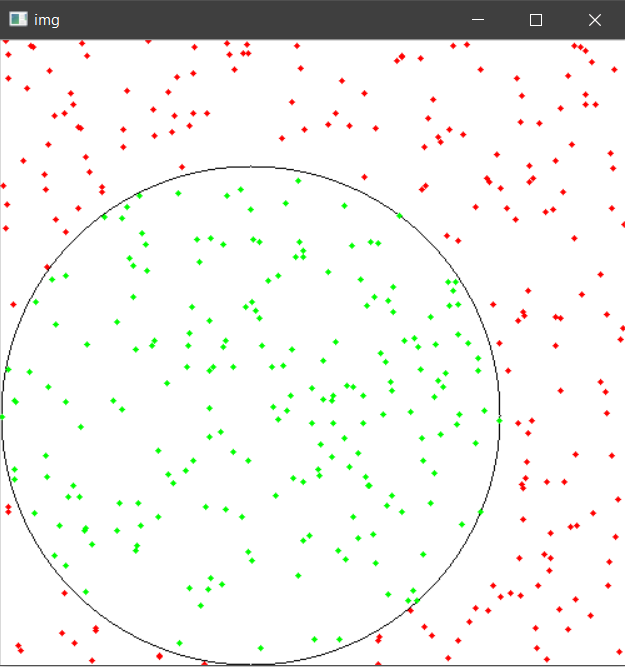